In [1]:
import pandas as pd
import numpy as np

data = pd.read_csv(r"C:\Users\Aayush Kuloor\Downloads\netflix_titles.csv")

In [3]:
print(data.head())

  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021        

In [5]:
print(data.tail())

     show_id     type        title         director  \
8802   s8803    Movie       Zodiac    David Fincher   
8803   s8804  TV Show  Zombie Dumb              NaN   
8804   s8805    Movie   Zombieland  Ruben Fleischer   
8805   s8806    Movie         Zoom     Peter Hewitt   
8806   s8807    Movie       Zubaan      Mozez Singh   

                                                   cast        country  \
8802  Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...  United States   
8803                                                NaN            NaN   
8804  Jesse Eisenberg, Woody Harrelson, Emma Stone, ...  United States   
8805  Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...  United States   
8806  Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...          India   

             date_added  release_year rating   duration  \
8802  November 20, 2019          2007      R    158 min   
8803       July 1, 2019          2018  TV-Y7  2 Seasons   
8804   November 1, 2019          2009      R   

In [9]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB
None


In [15]:
print(data.shape)

(8807, 12)


In [17]:
import matplotlib.pyplot as plt

In [19]:
import seaborn as sns

In [27]:
print(data.describe())

       release_year
count   8807.000000
mean    2014.180198
std        8.819312
min     1925.000000
25%     2013.000000
50%     2017.000000
75%     2019.000000
max     2021.000000


In [29]:
print(data.columns)

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')


In [33]:
print(data.isnull().sum())

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


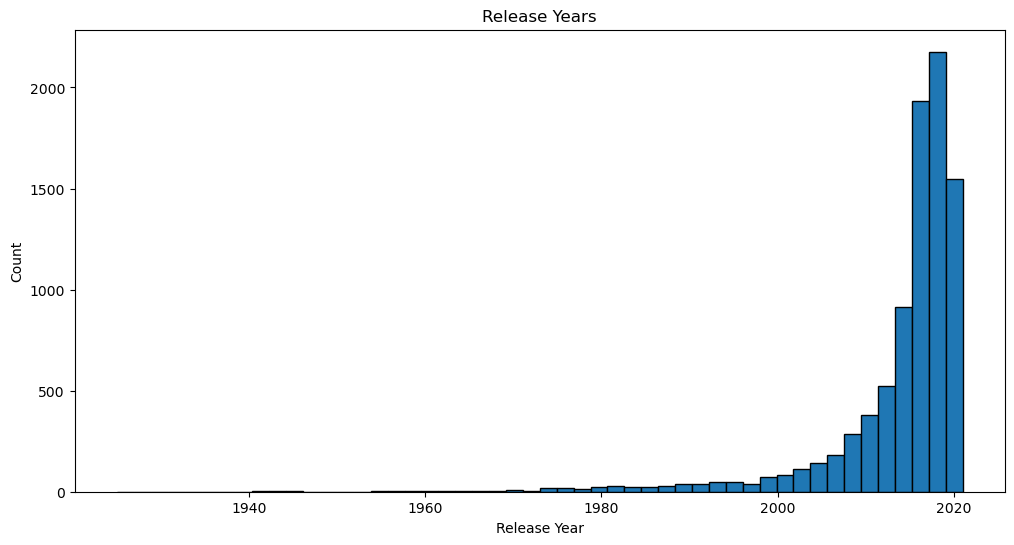

In [39]:
plt.figure(figsize=(12, 6))
plt.hist(data['release_year'].dropna(), bins = 50, edgecolor='k')
plt.title('Release Years')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.show()

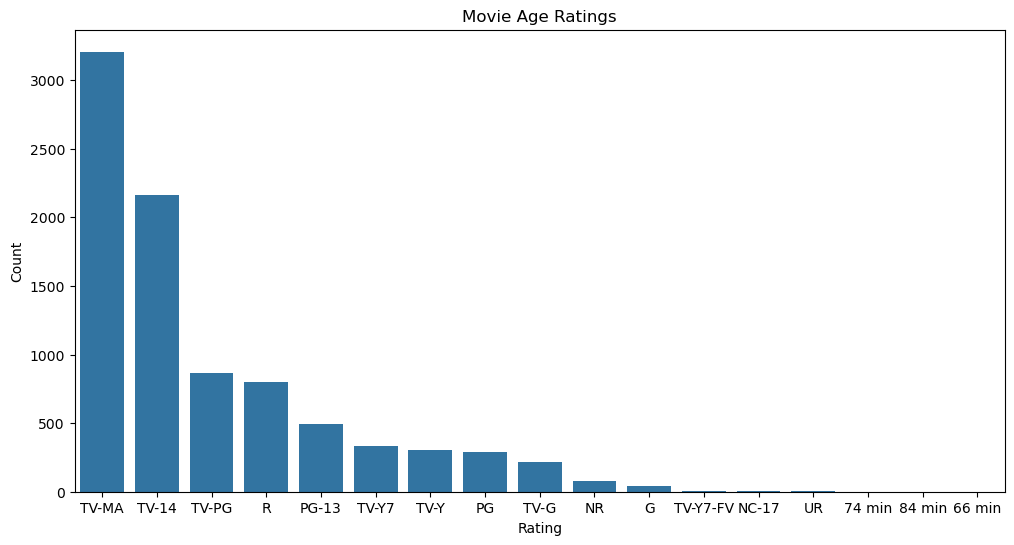

In [57]:
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='rating', order=data['rating'].value_counts().index)
plt.title('Movie Age Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

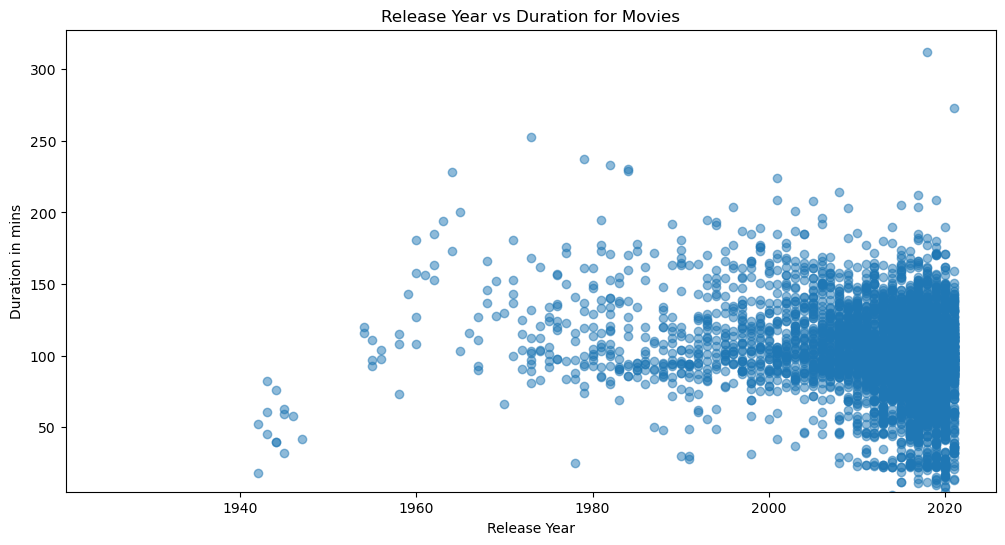

In [295]:
def convert_duration(duration):
    if pd.isna(duration):
        return 0
    if not isinstance(duration, str):
        return 0
    
    if 'Season' in duration:
        return  0 #int(duration.split()[0])*360 # taking 1 season as 6 hrs approx
    elif 'min' in duration:
        return int(duration.split()[0])
    return 0

data['duration_in_mins'] = data['duration'].apply(convert_duration)

plt.figure(figsize=(12,6))
plt.scatter(data['release_year'], data['duration_in_mins'], alpha = 0.5)
plt.title('Release Year vs Duration for Movies')
plt.xlabel('Release Year')
plt.ylabel('Duration in mins')
plt.ylim(bottom=5)
plt.show()

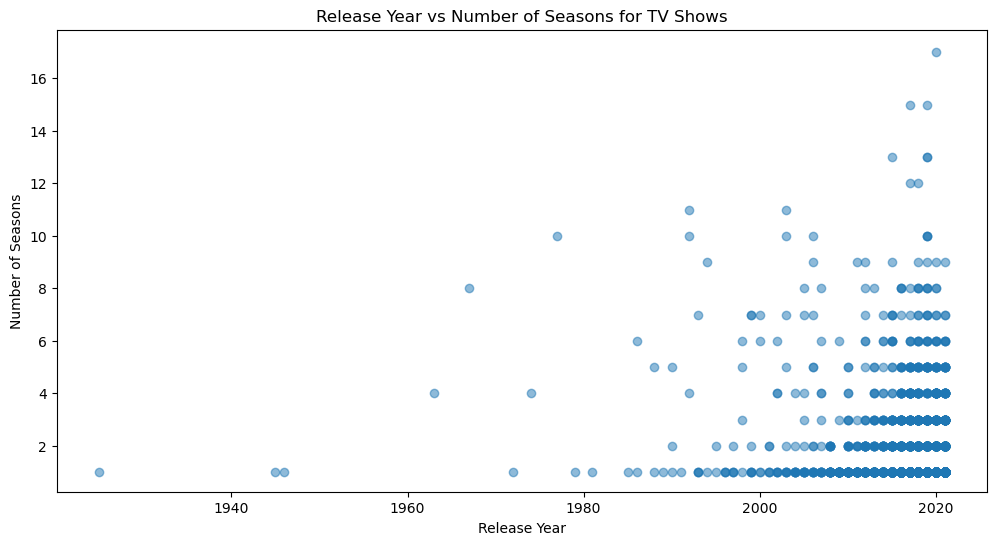

In [291]:
def convert_duration(duration):
    if pd.isna(duration):
        return 0
    if not isinstance(duration, str):
        return 0
    
    if 'Season' in duration:
        return int(duration.split()[0])
    elif 'min' in duration:
        return 0 # int(duration.split()[0])
    return 0

data['duration_in_mins'] = data['duration'].apply(convert_duration)

plt.figure(figsize=(12,6))
plt.scatter(data['release_year'], data['duration_in_mins'], alpha = 0.5)
plt.title('Release Year vs Number of Seasons for TV Shows')
plt.xlabel('Release Year')
plt.ylabel('Number of Seasons')
plt.ylim(bottom = 0.25)
plt.show()

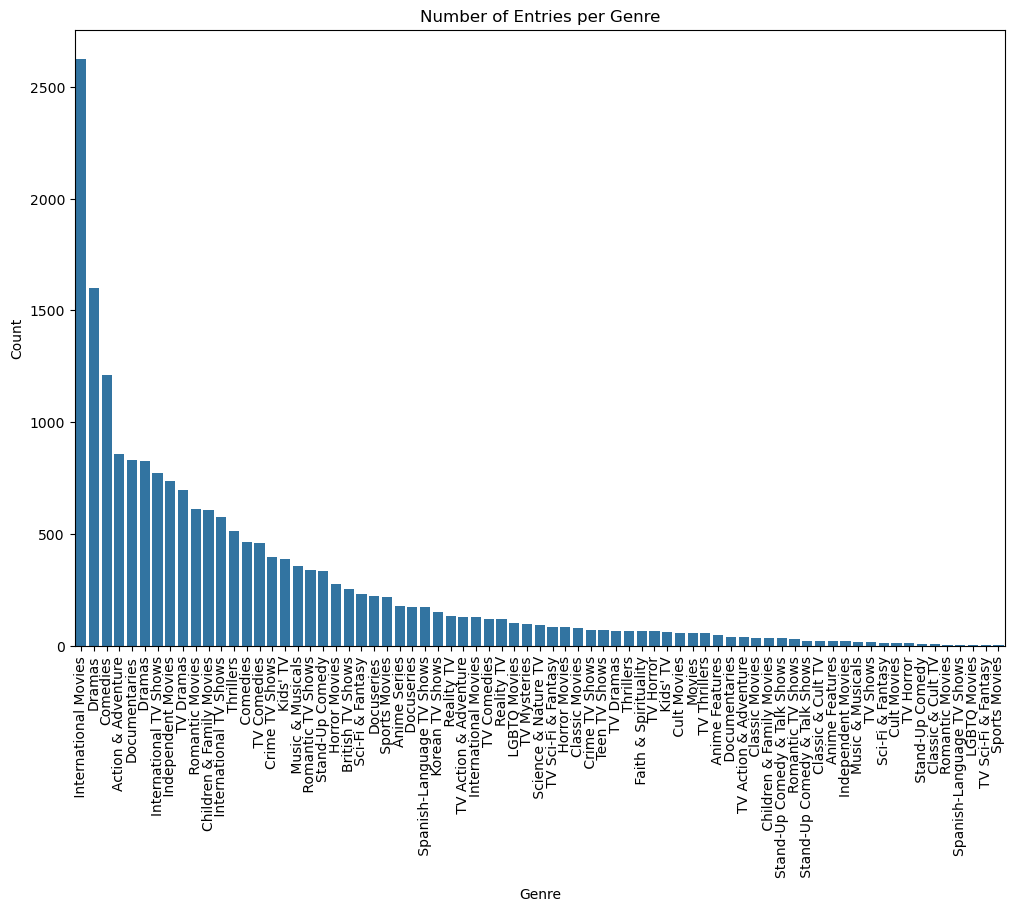

In [146]:
genre_counts = data['listed_in'].str.split(',', expand = True).stack().value_counts()

plt.figure(figsize=(12,8))
sns.barplot(x=genre_counts.index, y=genre_counts.values)
plt.title('Number of Entries per Genre')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

In [99]:
print(data['type'].value_counts())

type
Movie      6131
TV Show    2676
Name: count, dtype: int64


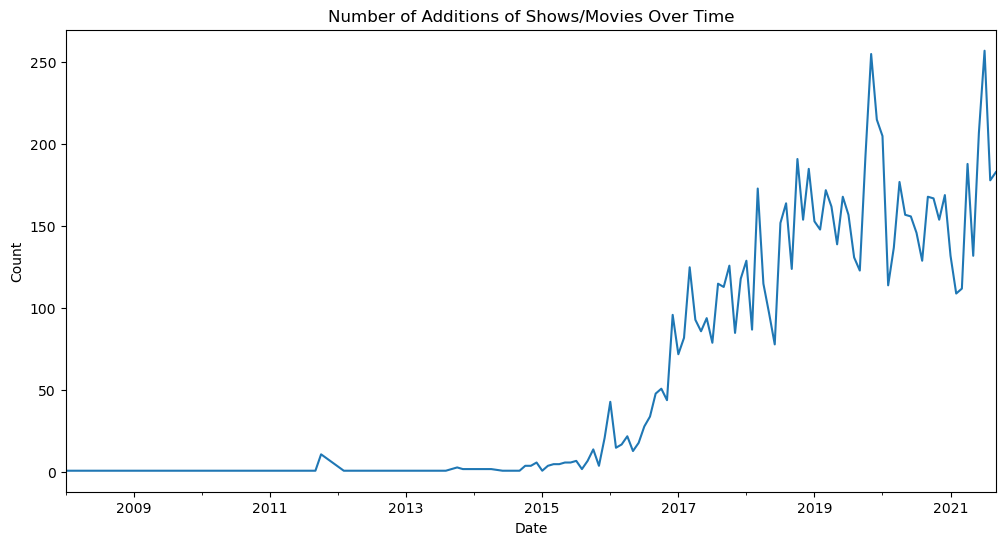

In [105]:
data['date_added_converted'] = data['date_added'].str.strip()
data['date_added_converted'] = pd.to_datetime(data['date_added_converted'])

plt.figure(figsize=(12, 6))
data.groupby(data['date_added_converted'].dt.to_period('M')).size().plot()
plt.title('Number of Additions of Shows/Movies Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.show()

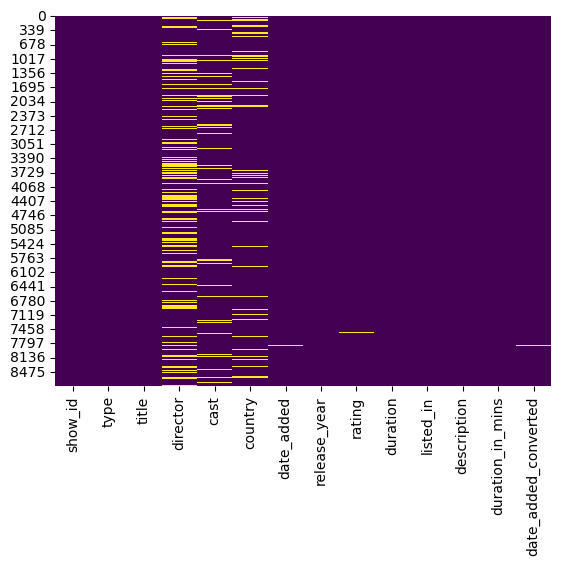

In [109]:
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.show()

In [111]:
print(data.isnull().sum())

show_id                    0
type                       0
title                      0
director                2634
cast                     825
country                  831
date_added                10
release_year               0
rating                     4
duration                   3
listed_in                  0
description                0
duration_in_mins           0
date_added_converted      10
dtype: int64


In [297]:
cleaned_data = data.dropna(subset=['date_added', 'rating', 'duration'])

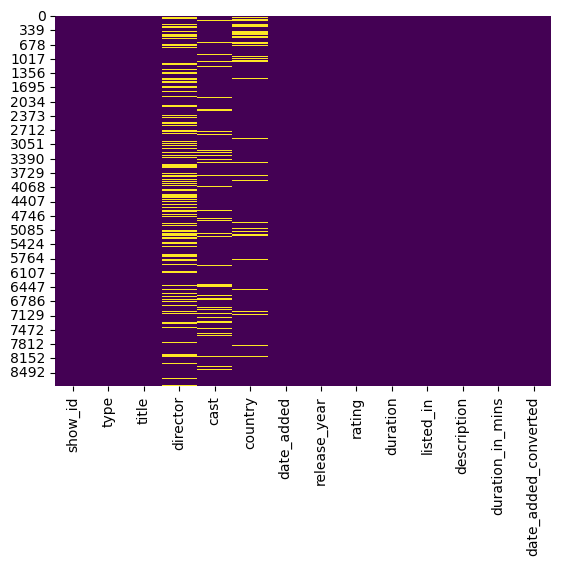

In [172]:
sns.heatmap(cleaned_data.isnull(), cbar=False, cmap='viridis')
plt.show()

In [299]:
cleaned_data.loc[:, 'director'] = cleaned_data['director'].fillna('Unknown')

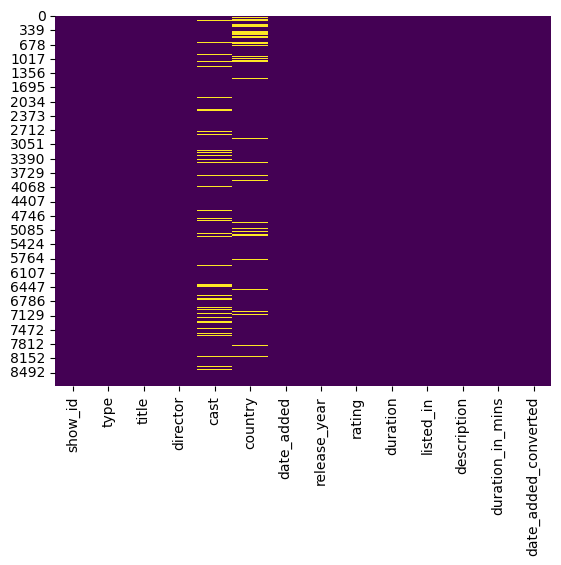

In [301]:
sns.heatmap(cleaned_data.isnull(), cbar=False, cmap='viridis')
plt.show()

In [303]:
cleaned_data.loc[:, 'cast'] = cleaned_data['cast'].fillna('Unknown')

In [305]:
cleaned_data.loc[:, 'country'] = cleaned_data['country'].fillna('Unknown')

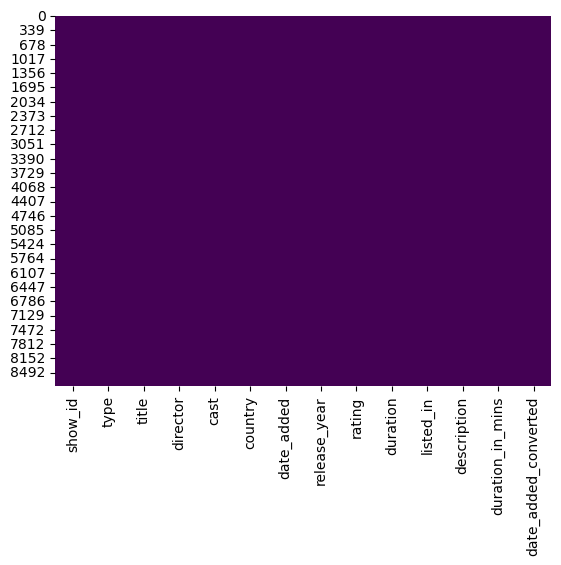

In [307]:
sns.heatmap(cleaned_data.isnull(), cbar=False, cmap='viridis')
plt.show()

In [402]:
cleaned_data_encoded = pd.get_dummies(cleaned_data, columns=['rating', 'type'])

In [404]:
print(cleaned_data_encoded.head())

  show_id                  title         director  \
0      s1   Dick Johnson Is Dead  Kirsten Johnson   
1      s2          Blood & Water          Unknown   
2      s3              Ganglands  Julien Leclercq   
3      s4  Jailbirds New Orleans          Unknown   
4      s5           Kota Factory          Unknown   

                                                cast        country  \
0                                            Unknown  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...        Unknown   
3                                            Unknown        Unknown   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year   duration  \
0  September 25, 2021          2020     90 min   
1  September 24, 2021          2021  2 Seasons   
2  September 24, 2021          2021   1 Season   
3  September 24, 2021          2021   1 Season   
4  S

In [406]:
genre_matrix = data['listed_in'].str.get_dummies(sep=', ')

In [408]:
print(genre_matrix)

      Action & Adventure  Anime Features  Anime Series  British TV Shows  \
0                      0               0             0                 0   
1                      0               0             0                 0   
2                      0               0             0                 0   
3                      0               0             0                 0   
4                      0               0             0                 0   
...                  ...             ...           ...               ...   
8802                   0               0             0                 0   
8803                   0               0             0                 0   
8804                   0               0             0                 0   
8805                   0               0             0                 0   
8806                   0               0             0                 0   

      Children & Family Movies  Classic & Cult TV  Classic Movies  Comedies  \
0       

In [410]:
cleaned_data_encoded = pd.concat([cleaned_data_encoded, genre_matrix], axis=1)

In [412]:
print(cleaned_data_encoded.head())

  show_id                  title         director  \
0      s1   Dick Johnson Is Dead  Kirsten Johnson   
1      s2          Blood & Water          Unknown   
2      s3              Ganglands  Julien Leclercq   
3      s4  Jailbirds New Orleans          Unknown   
4      s5           Kota Factory          Unknown   

                                                cast        country  \
0                                            Unknown  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...        Unknown   
3                                            Unknown        Unknown   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year   duration  \
0  September 25, 2021        2020.0     90 min   
1  September 24, 2021        2021.0  2 Seasons   
2  September 24, 2021        2021.0   1 Season   
3  September 24, 2021        2021.0   1 Season   
4  S

In [414]:
cleaned_data_encoded = cleaned_data_encoded.dropna(subset = ['date_added'])
cleaned_data_encoded['title'] = cleaned_data_encoded['title'].str.strip()
cleaned_data_encoded['director'] = cleaned_data_encoded['director'].str.strip()

cleaned_data_encoded = cleaned_data_encoded.drop_duplicates()

In [416]:
print(cleaned_data_encoded.head())

  show_id                  title         director  \
0      s1   Dick Johnson Is Dead  Kirsten Johnson   
1      s2          Blood & Water          Unknown   
2      s3              Ganglands  Julien Leclercq   
3      s4  Jailbirds New Orleans          Unknown   
4      s5           Kota Factory          Unknown   

                                                cast        country  \
0                                            Unknown  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...        Unknown   
3                                            Unknown        Unknown   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year   duration  \
0  September 25, 2021        2020.0     90 min   
1  September 24, 2021        2021.0  2 Seasons   
2  September 24, 2021        2021.0   1 Season   
3  September 24, 2021        2021.0   1 Season   
4  S

In [418]:
print(cleaned_data_encoded.columns)

Index(['show_id', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'duration', 'listed_in', 'description',
       'duration_in_mins', 'date_added_converted', 'rating_G', 'rating_NC-17',
       'rating_NR', 'rating_PG', 'rating_PG-13', 'rating_R', 'rating_TV-14',
       'rating_TV-G', 'rating_TV-MA', 'rating_TV-PG', 'rating_TV-Y',
       'rating_TV-Y7', 'rating_TV-Y7-FV', 'rating_UR', 'type_Movie',
       'type_TV Show', 'Action & Adventure', 'Anime Features', 'Anime Series',
       'British TV Shows', 'Children & Family Movies', 'Classic & Cult TV',
       'Classic Movies', 'Comedies', 'Crime TV Shows', 'Cult Movies',
       'Documentaries', 'Docuseries', 'Dramas', 'Faith & Spirituality',
       'Horror Movies', 'Independent Movies', 'International Movies',
       'International TV Shows', 'Kids' TV', 'Korean TV Shows', 'LGBTQ Movies',
       'Movies', 'Music & Musicals', 'Reality TV', 'Romantic Movies',
       'Romantic TV Shows', 'Sci-Fi & Fantasy', 'Scien

In [420]:
print(cleaned_data.columns)

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'duration_in_mins', 'date_added_converted'],
      dtype='object')


In [422]:
print(cleaned_data['type'].value_counts())

type
Movie      6126
TV Show    2664
Name: count, dtype: int64


In [424]:
print(cleaned_data['director'].value_counts())

director
Unknown                           2621
Rajiv Chilaka                       19
Raúl Campos, Jan Suter              18
Suhas Kadav                         16
Marcus Raboy                        16
                                  ... 
Raymie Muzquiz, Stu Livingston       1
Joe Menendez                         1
Eric Bross                           1
Will Eisenberg                       1
Mozez Singh                          1
Name: count, Length: 4527, dtype: int64


In [426]:
print(cleaned_data['release_year'].value_counts())

release_year
2018    1146
2017    1030
2019    1030
2020     953
2016     901
        ... 
1959       1
1925       1
1961       1
1947       1
1966       1
Name: count, Length: 74, dtype: int64


In [428]:
print(cleaned_data['rating'].value_counts())

rating
TV-MA       3205
TV-14       2157
TV-PG        861
R            799
PG-13        490
TV-Y7        333
TV-Y         306
PG           287
TV-G         220
NR            79
G             41
TV-Y7-FV       6
NC-17          3
UR             3
Name: count, dtype: int64


In [430]:
print('Duration Statsitics for Movies:')
print('Mean', cleaned_data['duration_in_mins'].mean())
print('Median', cleaned_data['duration_in_mins'].median())
print('Standard Deviation', cleaned_data['duration_in_mins'].std())

Duration Statsitics for Movies:
Mean 69.40352673492605
Median 88.5
Standard Deviation 51.501502784066616


In [432]:
movie_tv_split_data = pd.get_dummies(cleaned_data, columns = ['type'])

In [434]:
print(movie_tv_split_data.head())

  show_id                  title         director  \
0      s1   Dick Johnson Is Dead  Kirsten Johnson   
1      s2          Blood & Water          Unknown   
2      s3              Ganglands  Julien Leclercq   
3      s4  Jailbirds New Orleans          Unknown   
4      s5           Kota Factory          Unknown   

                                                cast        country  \
0                                            Unknown  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...        Unknown   
3                                            Unknown        Unknown   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021          2021  TV-MA   1 Season   
3  September 24, 2021     

In [436]:
movie_tv_split_data.loc[~movie_tv_split_data['type_Movie'], 'duration_in_mins'] = np.nan

In [438]:
print(movie_tv_split_data.head())

  show_id                  title         director  \
0      s1   Dick Johnson Is Dead  Kirsten Johnson   
1      s2          Blood & Water          Unknown   
2      s3              Ganglands  Julien Leclercq   
3      s4  Jailbirds New Orleans          Unknown   
4      s5           Kota Factory          Unknown   

                                                cast        country  \
0                                            Unknown  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...        Unknown   
3                                            Unknown        Unknown   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021          2021  TV-MA   1 Season   
3  September 24, 2021     

In [440]:
def convert_duration(duration):
    if pd.isna(duration):
        return 0
    if not isinstance(duration, str):
        return 0
    
    if 'Season' in duration:
        return int(duration.split()[0])
    elif 'min' in duration:
        return 0 # int(duration.split()[0])
    return 0

data['duration_in_mins'] = data['duration'].apply(convert_duration)

movie_tv_split_data['seasons'] = data['duration'].apply(convert_duration)

In [442]:
print(movie_tv_split_data.head())

  show_id                  title         director  \
0      s1   Dick Johnson Is Dead  Kirsten Johnson   
1      s2          Blood & Water          Unknown   
2      s3              Ganglands  Julien Leclercq   
3      s4  Jailbirds New Orleans          Unknown   
4      s5           Kota Factory          Unknown   

                                                cast        country  \
0                                            Unknown  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...        Unknown   
3                                            Unknown        Unknown   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021          2021  TV-MA   1 Season   
3  September 24, 2021     

In [444]:
movie_tv_split_data.loc[movie_tv_split_data['type_Movie'], 'seasons'] = np.nan

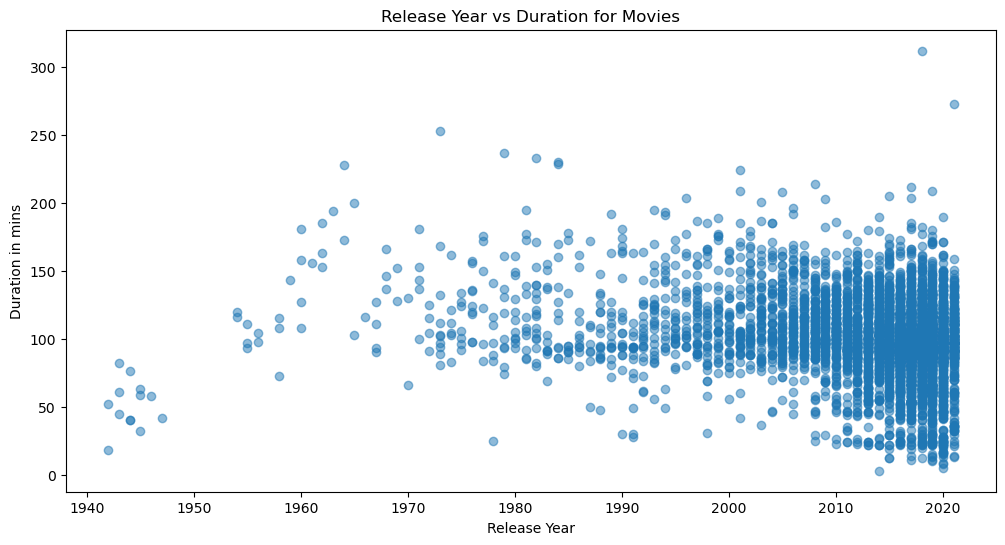

In [446]:
plt.figure(figsize=(12,6))
plt.scatter(movie_tv_split_data['release_year'], movie_tv_split_data['duration_in_mins'], alpha = 0.5)
plt.title('Release Year vs Duration for Movies')
plt.xlabel('Release Year')
plt.ylabel('Duration in mins')
plt.show()

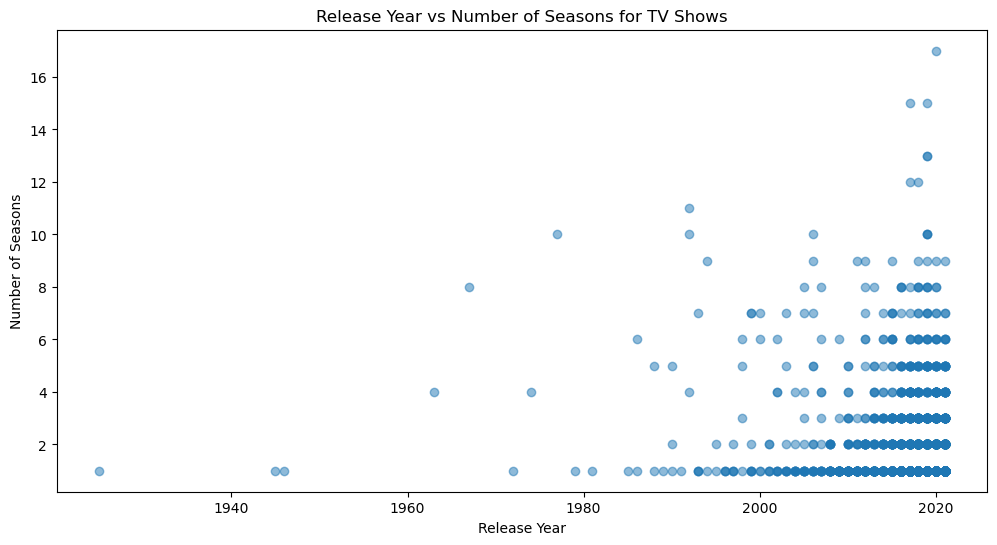

In [448]:
plt.figure(figsize=(12,6))
plt.scatter(movie_tv_split_data['release_year'], movie_tv_split_data['seasons'], alpha = 0.5)
plt.title('Release Year vs Number of Seasons for TV Shows')
plt.xlabel('Release Year')
plt.ylabel('Number of Seasons')
plt.show()

In [450]:
print('Duration Statsitics for Movies:')
print('Mean:', movie_tv_split_data['duration_in_mins'].mean())
print('Median:', movie_tv_split_data['duration_in_mins'].median())
print('Mode:', movie_tv_split_data['duration_in_mins'].mode().tolist())
print('Standard Deviation:', movie_tv_split_data['duration_in_mins'].std())

Duration Statsitics for Movies:
Mean: 99.58488410055502
Median: 98.0
Mode: [90.0]
Standard Deviation: 28.28322459538669


In [452]:
print('Season Statsitics for TV Shows:')
print('Mean:', movie_tv_split_data['seasons'].mean())
print('Median:', movie_tv_split_data['seasons'].median())
print('Mode:', movie_tv_split_data['seasons'].mode().tolist())
print('Standard Deviation:', movie_tv_split_data['seasons'].std())

Season Statsitics for TV Shows:
Mean: 1.7518768768768769
Median: 1.0
Mode: [1.0]
Standard Deviation: 1.5506216717055206


In [454]:
print(movie_tv_split_data.head())

  show_id                  title         director  \
0      s1   Dick Johnson Is Dead  Kirsten Johnson   
1      s2          Blood & Water          Unknown   
2      s3              Ganglands  Julien Leclercq   
3      s4  Jailbirds New Orleans          Unknown   
4      s5           Kota Factory          Unknown   

                                                cast        country  \
0                                            Unknown  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...        Unknown   
3                                            Unknown        Unknown   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021          2021  TV-MA   1 Season   
3  September 24, 2021     

In [456]:
print(cleaned_data_encoded.head())

  show_id                  title         director  \
0      s1   Dick Johnson Is Dead  Kirsten Johnson   
1      s2          Blood & Water          Unknown   
2      s3              Ganglands  Julien Leclercq   
3      s4  Jailbirds New Orleans          Unknown   
4      s5           Kota Factory          Unknown   

                                                cast        country  \
0                                            Unknown  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...        Unknown   
3                                            Unknown        Unknown   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year   duration  \
0  September 25, 2021        2020.0     90 min   
1  September 24, 2021        2021.0  2 Seasons   
2  September 24, 2021        2021.0   1 Season   
3  September 24, 2021        2021.0   1 Season   
4  S

In [663]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse import hstack
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [518]:
print(cleaned_data_encoded.columns)

cleaned_data_encoded['seasons'] = movie_tv_split_data['seasons']
cleaned_data_encoded['duration_in_mins'] =movie_tv_split_data['duration_in_mins'] 

Index(['title', 'director', 'cast', 'country', 'date_added', 'release_year',
       'duration', 'listed_in', 'description', 'date_added_converted',
       'rating_G', 'rating_NC-17', 'rating_NR', 'rating_PG', 'rating_PG-13',
       'rating_R', 'rating_TV-14', 'rating_TV-G', 'rating_TV-MA',
       'rating_TV-PG', 'rating_TV-Y', 'rating_TV-Y7', 'rating_TV-Y7-FV',
       'rating_UR', 'type_Movie', 'type_TV Show', 'Action & Adventure',
       'Anime Features', 'Anime Series', 'British TV Shows',
       'Children & Family Movies', 'Classic & Cult TV', 'Classic Movies',
       'Comedies', 'Crime TV Shows', 'Cult Movies', 'Documentaries',
       'Docuseries', 'Dramas', 'Faith & Spirituality', 'Horror Movies',
       'Independent Movies', 'International Movies', 'International TV Shows',
       'Kids' TV', 'Korean TV Shows', 'LGBTQ Movies', 'Movies',
       'Music & Musicals', 'Reality TV', 'Romantic Movies',
       'Romantic TV Shows', 'Sci-Fi & Fantasy', 'Science & Nature TV',
       'Spanis

In [490]:
genre_columns = [col for col in cleaned_data_encoded.columns if col in ['Action & Adventure', 'Anime Features', 'Anime Series',
       'British TV Shows', 'Children & Family Movies', 'Classic & Cult TV',
       'Classic Movies', 'Comedies', 'Crime TV Shows', 'Cult Movies',
       'Documentaries', 'Docuseries', 'Dramas', 'Faith & Spirituality',
       'Horror Movies', 'Independent Movies', 'International Movies',
       'International TV Shows', 'Kids\' TV', 'Korean TV Shows', 'LGBTQ Movies',
       'Movies', 'Music & Musicals', 'Reality TV', 'Romantic Movies',
       'Romantic TV Shows', 'Sci-Fi & Fantasy', 'Science & Nature TV',
       'Spanish-Language TV Shows', 'Sports Movies', 'Stand-Up Comedy',
       'Stand-Up Comedy & Talk Shows', 'TV Action & Adventure', 'TV Comedies',
       'TV Dramas', 'TV Horror', 'TV Mysteries', 'TV Sci-Fi & Fantasy',
       'TV Shows', 'TV Thrillers', 'Teen TV Shows', 'Thrillers']]

rating_columns = [col for col in cleaned_data_encoded.columns if col in ['rating_G', 'rating_NC-17',
       'rating_NR', 'rating_PG', 'rating_PG-13', 'rating_R', 'rating_TV-14',
       'rating_TV-G', 'rating_TV-MA', 'rating_TV-PG', 'rating_TV-Y',
       'rating_TV-Y7', 'rating_TV-Y7-FV', 'rating_UR']]

In [532]:
cleaned_data_encoded[rating_columns] = cleaned_data_encoded[rating_columns].astype(int)

In [540]:
print(cleaned_data_encoded[rating_columns].values)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [602]:
cleaned_data_encoded.loc[cleaned_data_encoded['type_Movie'], 'seasons'] = -1
cleaned_data_encoded.loc[cleaned_data_encoded['type_TV Show'], 'duration_in_mins'] = -1


In [629]:
X_genres = cleaned_data_encoded[genre_columns].values
X_ratings = cleaned_data_encoded[rating_columns].values
X_numerical = cleaned_data_encoded[['duration_in_mins', 'seasons', 'release_year']].values

tfidf = TfidfVectorizer(stop_words = 'english')
tfidf_matrix_description = tfidf.fit_transform(cleaned_data_encoded['description'])
tfidf_matrix_cast = tfidf.fit_transform(cleaned_data_encoded['cast'])

scaler = StandardScaler()
X_numerical_scaled = scaler.fit_transform(X_numerical)

X_combined = hstack([tfidf_matrix_description, tfidf_matrix_cast , X_genres, X_numerical_scaled, X_ratings])

In [631]:
cosine_sim = cosine_similarity(X_combined, X_combined)

In [643]:
print(cosine_sim.shape[0])
print(len(cleaned_data_encoded))

8790
8790


In [637]:
cleaned_data_encoded_reset = cleaned_data_encoded.reset_index(drop=True)


In [639]:
print(cleaned_data_encoded_reset.index)

RangeIndex(start=0, stop=8790, step=1)


In [ ]:
def get_recommendations(title, cleaned_data_encoded, cosine_sim):
    idx_list = cleaned_data_encoded.index[cleaned_data_encoded['title'] == title].tolist()
    if not idx_list:
        return f"Movie with title '{title}' not found."
    
    idx = idx_list[0]
    
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]
    
    movie_indices = [i[0] for i in sim_scores]
    return cleaned_data_encoded['title'].iloc[movie_indices]



print(get_recommendations('Stranger Things', cleaned_data_encoded_reset, cosine_sim))

In [655]:
final_data = cleaned_data_encoded

In [661]:
Xr = final_data[['release_year']].values
yr = final_data['duration_in_mins']

Xr_train, Xr_test, yr_train, yr_test = train_test_split(Xr, yr, test_size = 0.2, random_state=42)
reg_model = LinearRegression()
reg_model.fit(Xr_train, yr_train)

yr_pred = reg_model.predict(Xr_test)

In [707]:
print('Mean Absolute Error:', mean_absolute_error(yr_test, yr_pred))
print('Mean Squared Error:', mean_squared_error(yr_test, yr_pred))
print('R-squared:', r2_score(yr_test, yr_pred))

Mean Absolute Error: 44.29913967672711
Mean Squared Error: 2521.4512092317605
R-squared: 0.041000113773798974


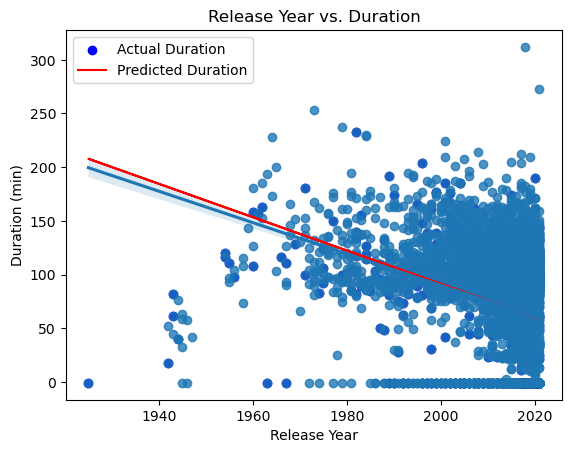

In [685]:
plt.scatter(Xr_test, yr_test, color='blue', label='Actual Duration')
plt.plot(Xr_test, yr_pred, color='red', label='Predicted Duration')
plt.xlabel('Release Year')
sns.regplot(x=Xr.flatten(), y=yr, ci=80)
plt.ylabel('Duration (min)')
plt.title('Release Year vs. Duration')
plt.legend()
plt.show()

In [691]:
average_duration_per_genre = {}
for genre in genre_columns:
    genre_data = final_data[final_data[genre]==1]
    average_duration = genre_data['duration_in_mins'].mean()
    average_duration_per_genre[genre] = average_duration

In [693]:
average_duration_df = pd.DataFrame(list(average_duration_per_genre.items()), columns = ['Genre', 'Average Duration'])

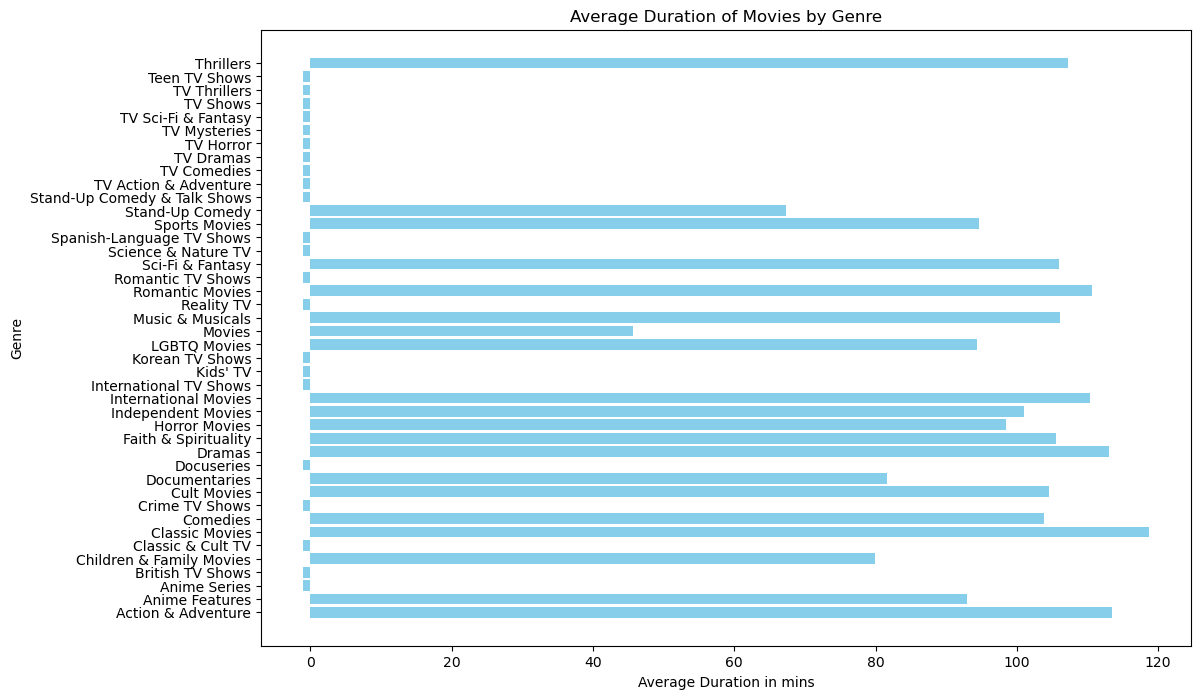

In [709]:
plt.figure(figsize = (12, 8))
plt.barh(average_duration_df['Genre'], average_duration_df['Average Duration'], color='skyblue')
plt.xlabel('Average Duration in mins')
plt.ylabel('Genre')
plt.title('Average Duration of Movies by Genre')
plt.show()

In [713]:
average_seasons_per_genre = {}
for genre in genre_columns:
    genre_data = final_data[final_data[genre]==1]
    average_seasons = genre_data['seasons'].mean()
    average_seasons_per_genre[genre] = average_seasons

average_seasons_df = pd.DataFrame(list(average_seasons_per_genre.items()), columns = ['Genre', 'Average Seasons'])

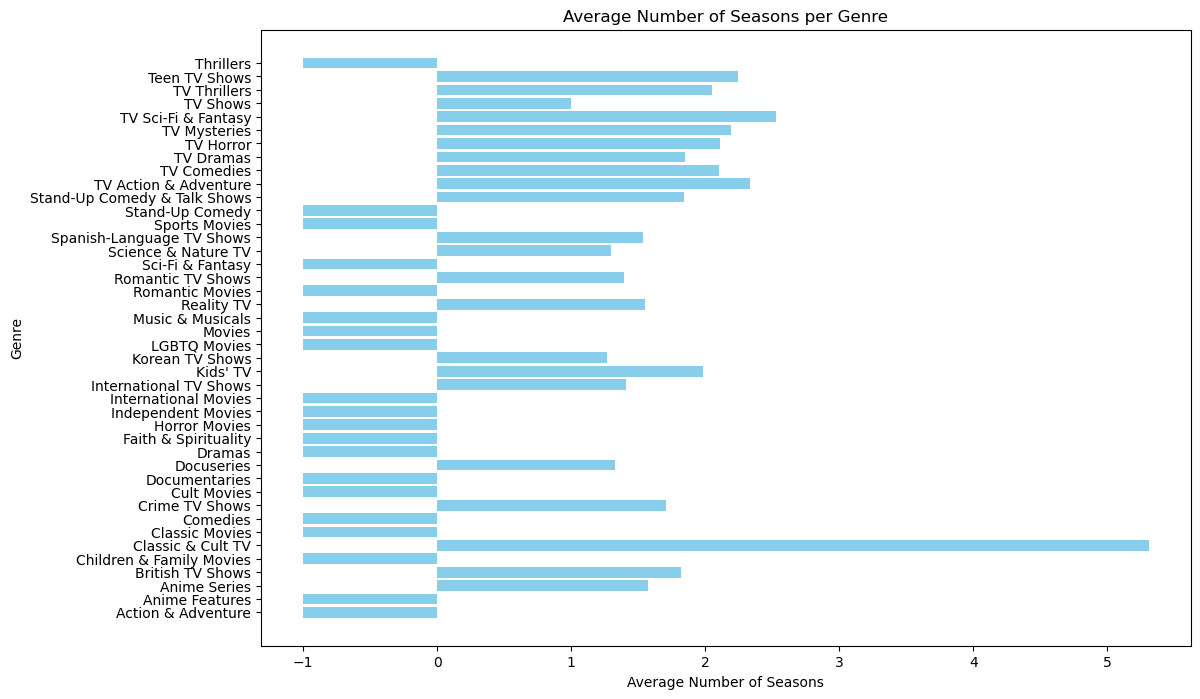

In [721]:
plt.figure(figsize = (12, 8))
plt.barh(average_seasons_df['Genre'], average_seasons_df['Average Seasons'], color='skyblue')
plt.xlabel('Average Number of Seasons')
plt.ylabel('Genre')
plt.title('Average Number of Seasons per Genre')
plt.show()

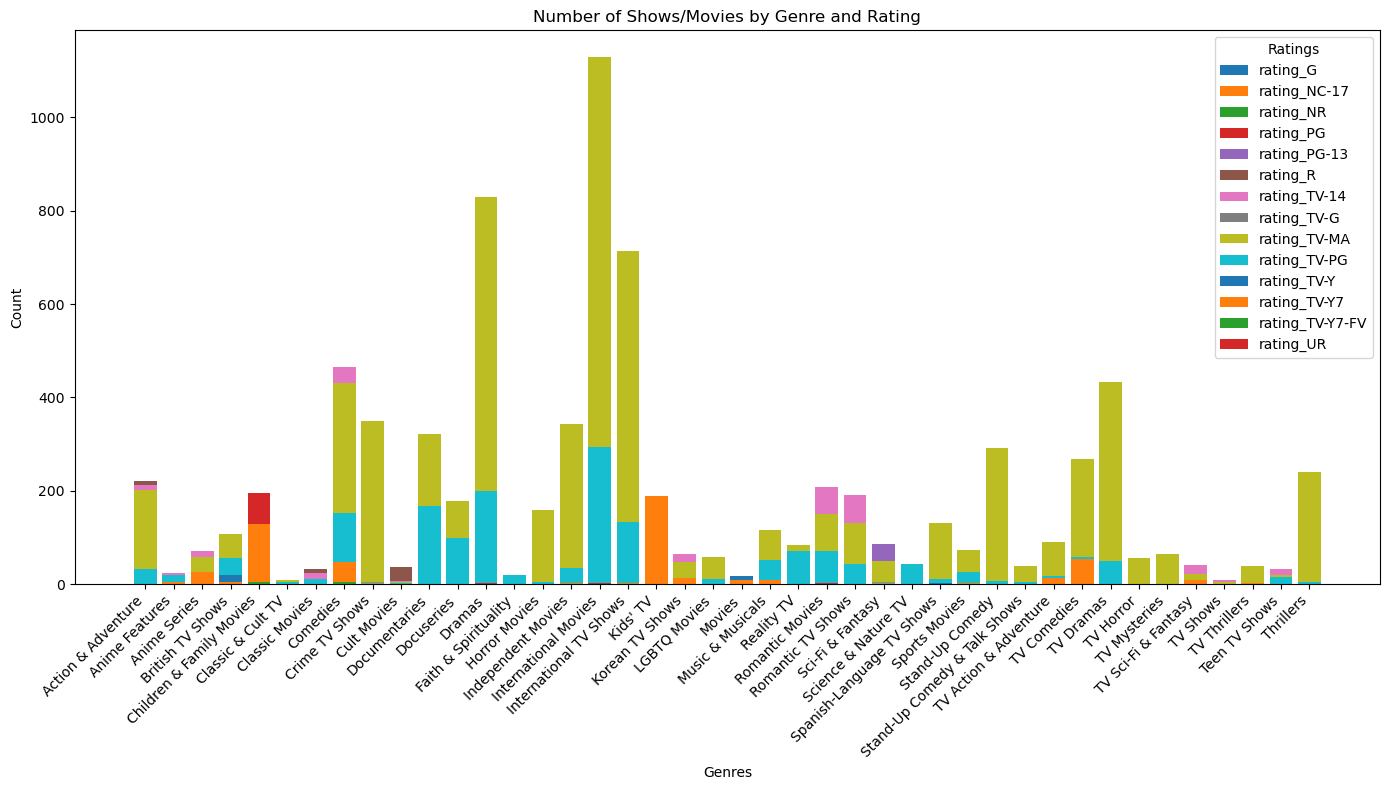

In [755]:
genre_distribution = final_data.groupby(rating_columns)[genre_columns].sum()
rating_distribution = genre_distribution.groupby(rating_columns).sum()

genre_counts_by_rating = final_data.groupby(rating_columns)[genre_columns].sum().reset_index()

genre_long = genre_counts_by_rating.melt(id_vars=rating_columns, value_vars=genre_columns, var_name='Genre', value_name='Count')

plt.figure(figsize=(14, 8))
for rating in rating_columns:
    subset = genre_long[genre_long[rating] == 1]
    plt.bar(subset['Genre'], subset['Count'], label=rating)

plt.xlabel('Genres')
plt.ylabel('Count')
plt.title('Number of Shows/Movies by Genre and Rating')
plt.legend(title='Ratings')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()